# Manual Input

In [2]:
import hashlib
import numpy as np
import math
class FlajoletMartin:
    def __init__(self, num_hashes=128):
        self.num_hashes = num_hashes
        self.max_trailing_zeros = np.zeros(num_hashes, dtype=int)
        self.hash_functions = self._generate_hash_functions()

    def _hash(self, user_id, seed):
        return int(hashlib.md5((str(seed) + user_id).encode('utf8')).hexdigest(), 16)

    def _generate_hash_functions(self):
        return [lambda user_id, seed=i: self._hash(user_id, seed) for i in range(self.num_hashes)]

    def add(self, user_id):
        for i, hash_fn in enumerate(self.hash_functions):
            hash_value = hash_fn(user_id)
            trailing_zeros = self._count_trailing_zeros(hash_value)
            self.max_trailing_zeros[i] = max(self.max_trailing_zeros[i], trailing_zeros)

    def _count_trailing_zeros(self, hash_value):
        binary = bin(hash_value)[2:]  
        return len(binary) - len(binary.rstrip('0'))

    def estimate(self):
        avg_trailing_zeros = np.mean(self.max_trailing_zeros)
        return 2 ** avg_trailing_zeros

def extract_distinct_users(data):
    flajolet_martin = FlajoletMartin()

    for user_id in data:
        flajolet_martin.add(user_id)

    estimated_distinct_users = flajolet_martin.estimate()
    return estimated_distinct_users


if __name__ == "__main__":
    twitter_users = [
        "user1", "user2", "user3", "user4", "user5", 
        "user1", "user6", "user2", "user7", "user8", 
        "user9", "user3", "user10"
    ]

    estimated_distinct_users = extract_distinct_users(twitter_users)
    print(f"Estimated number of distinct Twitter users: {estimated_distinct_users}")


Estimated number of distinct Twitter users: 13.600850829748188


# Number of distinct elements using the Flajolet-Martin Algorithm 

In [1]:
import random
import math

def trailing_zeros(x):
	""" Counting number of trailing zeros 
	in the binary representation of x."""
	if x == 0:
		return 1
	count = 0
	while x & 1 == 0:
		count += 1
		x >>= 1
	return count

def flajolet_martin(dataset, k):
	"""Number of distinct elements using
	the Flajolet-Martin Algorithm."""
	max_zeros= 0
	for i in range(k):
		hash_vals = [trailing_zeros(random.choice(dataset))
					for _ in range(len(dataset))]
		max_zeros = max(max_zeros, max(hash_vals))
	
	return 2 ** max_zeros

# Example 
dataset = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
dist_num = flajolet_martin(dataset, 10)
print("Estimated number of distinct elements:", dist_num)



Estimated number of distinct elements: 8


# FlajoletMartin.csv


Processing ID: user_id,tweet_id,timestamp,text
 Hash function 1: openssl_sha1 - Hash Value: 489570820091973629124256455385465445857967209043, Trailing Zeros: 0
 Updated max trailing zeros for hash function 1: 0
 Hash function 2: openssl_md5 - Hash Value: 146176850344719615339447831435677889459, Trailing Zeros: 0
 Updated max trailing zeros for hash function 2: 0
 Hash function 3: openssl_sha256 - Hash Value: 7453218487498921022668531638275771790475079742930658678848496012317007830196, Trailing Zeros: 2
 Updated max trailing zeros for hash function 3: 2

Processing ID: user1,001,2023-09-10 10:30:00,"This is a tweet."
 Hash function 1: openssl_sha1 - Hash Value: 633231589392473565304117362936022268652119508187, Trailing Zeros: 0
 Updated max trailing zeros for hash function 1: 0
 Hash function 2: openssl_md5 - Hash Value: 271561278878673828024585967615670714100, Trailing Zeros: 2
 Updated max trailing zeros for hash function 2: 2
 Hash function 3: openssl_sha256 - Hash Value: 1104537158

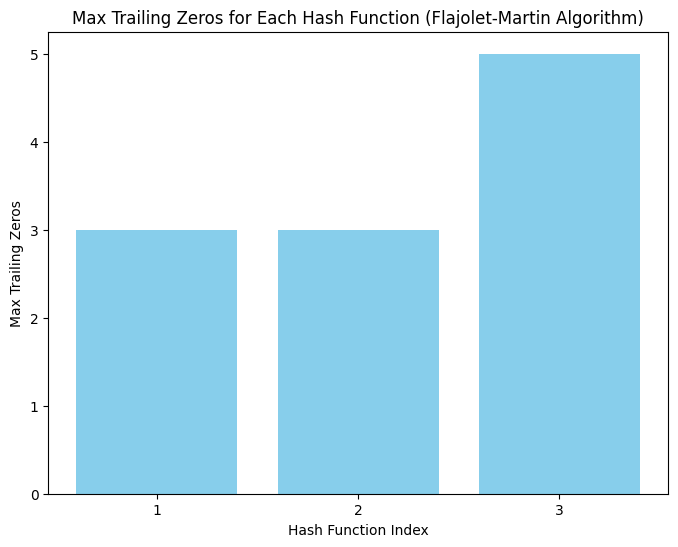

In [3]:
# %% 
import csv
import hashlib
import matplotlib.pyplot as plt

# Function to count trailing zeros in the binary representation of a hash value
def trailing_zeros(hash_value):
    binary_representation = bin(hash_value)[2:]
    count = 0
    for digit in reversed(binary_representation):
        if digit == '0':
            count += 1
        else:
            break
    return count

# Flajolet-Martin algorithm implementation
def flajolet_martin(file_path, num_hash_functions):
    counters = [0] * num_hash_functions
    hash_functions = [hashlib.sha1, hashlib.md5, hashlib.sha256]  # List of hash functions

    with open(file_path, 'r') as csvfile:
        reader = csv.reader(csvfile, delimiter='\t')
        for row in reader:
            tweet_id = row[0]  # Assuming tweet_id is in the first column
            print(f"\nProcessing ID: {tweet_id}")
            for i in range(min(num_hash_functions, len(hash_functions))):
                # Compute the hash value for the tweet ID
                hash_value = int(hash_functions[i](tweet_id.encode()).hexdigest(), 16)
                zeros = trailing_zeros(hash_value)
                print(f" Hash function {i+1}: {hash_functions[i].__name__} - Hash Value: {hash_value}, Trailing Zeros: {zeros}")
                counters[i] = max(counters[i], zeros)
                print(f" Updated max trailing zeros for hash function {i+1}: {counters[i]}")

    print("\nFinal counters (max trailing zeros for each hash function):", counters)
    return counters

# Visualization function for counters
def visualize_counters(counters):
    hash_function_indices = list(range(1, len(counters) + 1))
    plt.figure(figsize=(8, 6))
    plt.bar(hash_function_indices, counters, color='skyblue')
    plt.xlabel('Hash Function Index')
    plt.ylabel('Max Trailing Zeros')
    plt.title('Max Trailing Zeros for Each Hash Function (Flajolet-Martin Algorithm)')
    plt.xticks(hash_function_indices)
    plt.show()

# Example dataset file path (update with actual path if necessary)
dataset_file = r'FlajoletMartin.csv'  # Update this with the actual file path
num_hash_functions = 3

# Run the Flajolet-Martin algorithm and visualize results
counters = flajolet_martin(dataset_file, num_hash_functions)
visualize_counters(counters)


# products.csv


Processing ID: ID,ProductName,Category,Price
 Hash function 1: openssl_sha1 - Hash Value: 704101962416997788045755018838890145185270009912, Trailing Zeros: 3
 Updated max trailing zeros for hash function 1: 3
 Hash function 2: openssl_md5 - Hash Value: 268116861970769212786751472656724283510, Trailing Zeros: 1
 Updated max trailing zeros for hash function 2: 1
 Hash function 3: openssl_sha256 - Hash Value: 23622757672080779813774612936465952571695840568928785126481516619191438413175, Trailing Zeros: 0
 Updated max trailing zeros for hash function 3: 0

Processing ID: 1,WidgetA,Electronics,19.99
 Hash function 1: openssl_sha1 - Hash Value: 1360800453969913756760468236604588178099322643220, Trailing Zeros: 2
 Updated max trailing zeros for hash function 1: 3
 Hash function 2: openssl_md5 - Hash Value: 233215027443337978702340458923824973712, Trailing Zeros: 4
 Updated max trailing zeros for hash function 2: 4
 Hash function 3: openssl_sha256 - Hash Value: 1137447231370753223810194339249

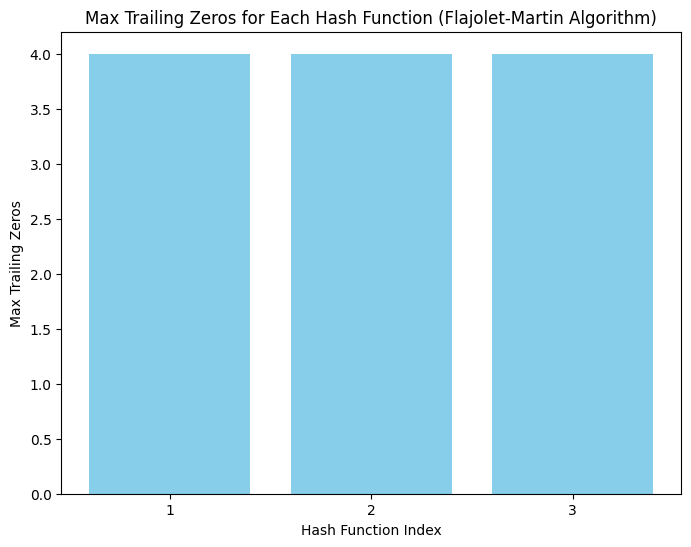

In [5]:
# %% 
import csv
import hashlib
import matplotlib.pyplot as plt

# Function to count trailing zeros in the binary representation of a hash value
def trailing_zeros(hash_value):
    binary_representation = bin(hash_value)[2:]
    count = 0
    for digit in reversed(binary_representation):
        if digit == '0':
            count += 1
        else:
            break
    return count

# Flajolet-Martin algorithm implementation
def flajolet_martin(file_path, num_hash_functions):
    counters = [0] * num_hash_functions
    hash_functions = [hashlib.sha1, hashlib.md5, hashlib.sha256]  # List of hash functions

    with open(file_path, 'r') as csvfile:
        reader = csv.reader(csvfile, delimiter='\t')
        for row in reader:
            tweet_id = row[0]  # Assuming tweet_id is in the first column
            print(f"\nProcessing ID: {tweet_id}")
            for i in range(min(num_hash_functions, len(hash_functions))):
                # Compute the hash value for the tweet ID
                hash_value = int(hash_functions[i](tweet_id.encode()).hexdigest(), 16)
                zeros = trailing_zeros(hash_value)
                print(f" Hash function {i+1}: {hash_functions[i].__name__} - Hash Value: {hash_value}, Trailing Zeros: {zeros}")
                counters[i] = max(counters[i], zeros)
                print(f" Updated max trailing zeros for hash function {i+1}: {counters[i]}")

    print("\nFinal counters (max trailing zeros for each hash function):", counters)
    return counters

# Visualization function for counters
def visualize_counters(counters):
    hash_function_indices = list(range(1, len(counters) + 1))
    plt.figure(figsize=(8, 6))
    plt.bar(hash_function_indices, counters, color='skyblue')
    plt.xlabel('Hash Function Index')
    plt.ylabel('Max Trailing Zeros')
    plt.title('Max Trailing Zeros for Each Hash Function (Flajolet-Martin Algorithm)')
    plt.xticks(hash_function_indices)
    plt.show()

# Example dataset file path (update with actual path if necessary)
dataset_file = r'products.csv'  # Update this with the actual file path
num_hash_functions = 3

# Run the Flajolet-Martin algorithm and visualize results
counters = flajolet_martin(dataset_file, num_hash_functions)
visualize_counters(counters)


# FlajolatMartin.csv

In [12]:
import random
import hashlib
import math
import csv

def hash_user_id(user_id):
    """Hash the user ID using SHA256 and return the hash as an integer."""
    hash_object = hashlib.sha256(user_id.encode())
    hash_hex = hash_object.hexdigest()
    return int(hash_hex, 16)

def count_trailing_zeros(x):
    """Count the number of trailing zeros in the binary representation of x."""
    return len(bin(x)) - len(bin(x).rstrip('0'))

class FlajoletMartin:
    def __init__(self, num_hashes=64):  # Fixed __init__ method
        self.num_hashes = num_hashes
        self.max_trailing_zeros = [0] * num_hashes
        self.hash_seeds = [random.randint(0, 2**32 - 1) for _ in range(num_hashes)]
        
    def process_user(self, user_id):
        """Process a user ID by hashing and counting trailing zeros."""
        for i in range(self.num_hashes):
            seed = self.hash_seeds[i]
            combined_id = f"{user_id}-{seed}"
            hashed_value = hash_user_id(combined_id)
            trailing_zeros = count_trailing_zeros(hashed_value)
            self.max_trailing_zeros[i] = max(self.max_trailing_zeros[i], trailing_zeros)
    
    def estimate_cardinality(self):
        """Estimate the number of distinct users."""
        avg_trailing_zeros = sum(self.max_trailing_zeros) / self.num_hashes
        return 2 ** avg_trailing_zeros


def load_and_process_twitter_data(file_path, num_hashes=64):
    """Load Twitter data and process each user ID."""
    fm = FlajoletMartin(num_hashes=num_hashes)

    with open(file_path, 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            user_id = row['user_id']
            fm.process_user(user_id)
    
    return fm.estimate_cardinality()

file_path = r"FlajoletMartin.csv"
estimated_users = load_and_process_twitter_data(file_path, num_hashes=64)
print(f"Estimated number of distinct Twitter users: {estimated_users}")

def multiple_flajolet_martin(file_path, instances=10, num_hashes=64):
    """Run multiple instances of the Flajolet-Martin algorithm."""
    estimates = []
    for _ in range(instances):
        fm_instance = FlajoletMartin(num_hashes=num_hashes)
        with open(file_path, 'r') as file:
            reader = csv.DictReader(file)
            for row in reader:
                user_id = row['user_id']
                fm_instance.process_user(user_id)
        estimates.append(fm_instance.estimate_cardinality())
    
    return sum(estimates) / len(estimates)

improved_estimate = multiple_flajolet_martin(file_path, instances=10, num_hashes=64)
print(f"Improved estimate of distinct Twitter users: {improved_estimate}")


or

import random
import hashlib
import math
import csv

def hash_user_id(user_id):
    """Hash the user ID using SHA256 and return the hash as an integer."""
    hash_object = hashlib.sha256(user_id.encode())
    hash_hex = hash_object.hexdigest()
    return int(hash_hex, 16)

def count_trailing_zeros(x):
    """Count the number of trailing zeros in the binary representation of x."""
    return len(bin(x)) - len(bin(x).rstrip('0'))

class FlajoletMartin:
    def _init_(self, num_hashes=64):
        self.num_hashes = num_hashes
        self.max_trailing_zeros = [0] * num_hashes
        self.hash_seeds = [random.randint(0, 2**32 - 1) for _ in range(num_hashes)]
        
    def process_user(self, user_id):
        """Process a user ID by hashing and counting trailing zeros."""
        for i in range(self.num_hashes):
            seed = self.hash_seeds[i]
            combined_id = f"{user_id}-{seed}"
            hashed_value = hash_user_id(combined_id)
            trailing_zeros = count_trailing_zeros(hashed_value)
            self.max_trailing_zeros[i] = max(self.max_trailing_zeros[i], trailing_zeros)
    
    def estimate_cardinality(self):
        """Estimate the number of distinct users."""
        avg_trailing_zeros = sum(self.max_trailing_zeros) / self.num_hashes
        return 2 ** avg_trailing_zeros


def load_and_process_twitter_data(file_path, num_hashes=64):
    """Load Twitter data and process each user ID."""
    fm = FlajoletMartin(num_hashes=num_hashes)

    with open(file_path, 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            user_id = row['user_id']
            fm.process_user(user_id)
    
    return fm.estimate_cardinality()

file_path = r"FlajoletMartin.csv"
estimated_users = load_and_process_twitter_data(file_path, num_hashes=64)
print(f"Estimated number of distinct Twitter users: {estimated_users}")

def multiple_flajolet_martin(file_path, instances=10, num_hashes=64):
    """Run multiple instances of the Flajolet-Martin algorithm."""
    estimates = []
    for _ in range(instances):
        fm_instance = FlajoletMartin(num_hashes=num_hashes)
        with open(file_path, 'r') as file:
            reader = csv.DictReader(file)
            for row in reader:
                user_id = row['user_id']
                fm_instance.process_user(user_id)
        estimates.append(fm_instance.estimate_cardinality())
    
    return sum(estimates) / len(estimates)

improved_estimate = multiple_flajolet_martin(file_path, instances=10, num_hashes=64)
print(f"Improved estimate of distinct Twitter users: {improved_estimate}")



Estimated number of distinct Twitter users: 8.0
Improved estimate of distinct Twitter users: 8.80267042456352


# Simple Flajolet with one hash function without any dataset

In [10]:
# Simple Flajolet with one hash function without any dataset
# List of user IDs
user_ids = [1,3,2,1,2,3,4,3,1,2,3,1]

# Step 1: Hash function (2x - 3) % 7
def custom_hash_function(user_id):
    return (6 * user_id +1) % 5

# Step 2: Count trailing zeros in the binary representation
def count_trailing_zeros(x):
    return len(bin(x)) - len(bin(x).rstrip('0'))

# Flajolet-Martin-like logic to estimate distinct users
def flajolet_martin_estimate(user_ids):
    max_trailing_zeros = 0  # Initialize the maximum trailing zeros to zero
    
    for user_id in user_ids:
        # Apply the custom hash function
        hashed_value = custom_hash_function(user_id)
        # Count trailing zeros in the binary representation of the hashed value
        trailing_zeros = count_trailing_zeros(hashed_value)
        # Update the maximum trailing zeros found
        max_trailing_zeros = max(max_trailing_zeros, trailing_zeros)
    
    # Step 3: Estimate the number of distinct users
    # The estimate is 2^max_trailing_zeros
    estimated_distinct_users = 2 ** max_trailing_zeros
    return estimated_distinct_users

# Run the Flajolet-Martin estimation
estimated_users = flajolet_martin_estimate(user_ids)

# Display the result
print(f"Estimated number of distinct users: {estimated_users}")

Estimated number of distinct users: 4


# Simple FLajolet with multiple hash functions without any dataset

In [11]:
# Simple FLajolet with multiple hash functions without any dataset
# List of user IDs
user_ids = [102,324,512,102,876,324,512,567,876,999,567,102]

# Step 1: Define the hash functions
def hash_function_1(user_id):
    return (user_id * 3+5) % 32

def hash_function_2(user_id):
    return (user_id * 7+11) % 32

def hash_function_3(user_id):
    return (user_id * 5+13) % 32

# Step 2: Count trailing zeros in the binary representation
def count_trailing_zeros(x):
    return len(bin(x)) - len(bin(x).rstrip('0'))

# Flajolet-Martin-like logic to estimate distinct users
def flajolet_martin_estimate(user_ids):
    max_trailing_zeros = 0  # Initialize the maximum trailing zeros to zero
    
    for user_id in user_ids:
        # Apply all hash functions
        hashes = [
            hash_function_1(user_id),
            hash_function_2(user_id),
            hash_function_3(user_id)
        ]
        
        # Count trailing zeros for each hash and update the maximum
        for hashed_value in hashes:
            trailing_zeros = count_trailing_zeros(hashed_value)
            max_trailing_zeros = max(max_trailing_zeros, trailing_zeros)
    
    # Step 3: Estimate the number of distinct users
    # The estimate is 2^max_trailing_zeros
    estimated_distinct_users = 2 ** max_trailing_zeros
    return estimated_distinct_users

# Run the Flajolet-Martin estimation
estimated_users = flajolet_martin_estimate(user_ids)

# Display the result
print(f"Estimated number of distinct users: {estimated_users}")

Estimated number of distinct users: 16
